# ORIE 4741 Project: COVID-19 Vaccine Discovery

**Group member: Meiqi Wu(mw849), Yuwei Liu (yl3388), Jialiang Sun(js3553), Vaish Gajaraj (vg289)**

## 1. Prepocessing

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

data_dir = 'D:/_ORIE 4741/Project'
SEED = 123
np.random.seed(SEED)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
bcell = pd.read_csv(f'{data_dir}/input_bcell.csv')
bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [17]:
bcell.shape

(14387, 14)

In [19]:
sars = pd.read_csv(f'{data_dir}/input_sars.csv')
sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [12]:
sars.shape

(520, 14)

In [20]:
covid = pd.read_csv(f'{data_dir}/input_covid.csv')
covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [21]:
covid.shape

(20312, 13)

In [22]:
# combine bcell and sars data as the training data
df1 = pd.concat([bcell, sars], axis=0, ignore_index=True)
df1.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [23]:
df1.shape

(14907, 14)

In [106]:
# feature columns
feature_cols = [col for col in df1.columns if col not in ['parent_protein_id', 'protein_seq', 'peptide_seq', 'target']]
feature_cols

['start_position',
 'end_position',
 'chou_fasman',
 'emini',
 'kolaskar_tongaonkar',
 'parker',
 'isoelectric_point',
 'aromaticity',
 'hydrophobicity',
 'stability']

In [26]:
# check whether there's missing values in the features and target columns
(df1[feature_cols+['target']].isnull()).sum()

start_position         0
end_position           0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [27]:
#Info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
parent_protein_id      14907 non-null object
protein_seq            14907 non-null object
start_position         14907 non-null int64
end_position           14907 non-null int64
peptide_seq            14907 non-null object
chou_fasman            14907 non-null float64
emini                  14907 non-null float64
kolaskar_tongaonkar    14907 non-null float64
parker                 14907 non-null float64
isoelectric_point      14907 non-null float64
aromaticity            14907 non-null float64
hydrophobicity         14907 non-null float64
stability              14907 non-null float64
target                 14907 non-null int64
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


# Exploratory data analysis

# Split data 

In [32]:
# split df into training set and test set
x_trn, x_tst, y_trn, y_tst = train_test_split(df1[feature_cols], df1.target, test_size=0.2, random_state=123)

In [33]:
# normalization
scaler = StandardScaler()
x_trn = pd.DataFrame(scaler.fit_transform(x_trn), index=x_trn.index, columns=feature_cols)
x_tst = pd.DataFrame(scaler.transform(x_tst), index=x_tst.index, columns=feature_cols)

In [34]:
x_trn.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
9563,-0.077596,-0.068241,-0.775690,-0.516136,1.141170,-1.177743,-0.590467,0.039982,0.390463,0.217021
4532,-0.427163,-0.431581,-1.317694,-0.388961,1.141170,-1.945223,-1.086743,0.616035,-0.224765,0.770494
2280,-0.301319,-0.311399,1.901967,1.325090,-1.478482,0.992286,1.392557,1.701828,2.068477,-0.787845
12536,-0.077596,-0.068241,-0.427838,-0.375455,-0.561604,-0.230488,-0.689735,1.967080,-0.132337,-0.015769
5733,-0.664868,-0.669149,-0.994110,0.416857,-1.703023,1.258128,1.556747,-1.014306,-3.693824,2.201148


In [35]:
x_trn.shape

(11925, 10)

# Logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=10, max_iter=10000)
lr_model.fit(x_trn, y_trn)
lr_err = 1 - lr_model.score(x_tst, y_tst)
lr_err

0.2699530516431925

In [142]:
# Predicted values
y_trn_pred1 = lr_model.predict(x_trn)
y_tst_pred1 = lr_model.predict(x_tst)

In [134]:
# coefficient and intercept
coef_element = np.array(feature_cols+['intercept'])
coef1 = pd.DataFrame(np.vstack((coef_element,np.append(lr_my_trn_pred1 = lr_model.predict(x_trn)
y_tst_pred1 = lr_model.predict(x_tst)odel.coef_,lr_model.intercept_)))).transpose()
coef1.columns = ["Variables", "Coefficients"]
coef1

,Variables,Coefficients
0,start_position,-1.4866792285635486
1,end_position,1.2044426180107823
2,chou_fasman,0.23200692318358032
3,emini,0.14912754148878013
4,kolaskar_tongaonkar,-0.07378492892650344
5,parker,-0.1413830445631981
6,isoelectric_point,-0.35677137587564317
7,aromaticity,0.03187016163416095
8,hydrophobicity,0.2862815561368751
9,stability,0.23540878632301593


In [66]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [143]:
regression_results(y_trn, y_trn_pred1)

explained variance:  -0.0439
r2:  -0.3428
MAE:  0.265
MSE:  0.265
RMSE:  0.5148


In [144]:
regression_results(y_tst, y_tst_pred1)

explained variance:  -0.0608
r2:  -0.3582
MAE:  0.27
MSE:  0.27
RMSE:  0.5196


The negative explained variance and $R^2$ shows that the plain logistic regression model does not fit the data well. We need to consider a new model. Now let's try logistic regression with penalty.

In [137]:
# Explore the logistic regression with penalty that has the lowest test error
N = np.array(range(0,15))
alpha = 0.00001*(4**N)
error_trn_lr = np.zeros(15)
error_tst_lr = np.zeros(15)

for i in range(0,15):
    lri = LogisticRegression(random_state=10, solver='sag', max_iter=10000, penalty='l2',C=alpha[i])
    lri.fit(x_trn, y_trn)
    error_trn_lr[i] = 1 - lri.score(x_trn, y_trn)
    error_tst_lr[i] = 1 - lri.score(x_tst, y_tst)

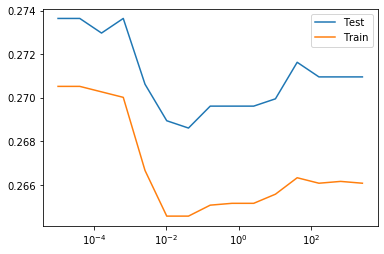

In [139]:
plt.figure(1)
plt.semilogx(alpha, error_tst_lr, label = 'Test')
plt.semilogx(alpha, error_trn_lr, label = 'Train')
plt.legend()

In [145]:
# Using the model with the smallest test error
penalty = alpha[np.argmin(error_tst_lr)]
lr_l2 = LogisticRegression(random_state=10, solver='sag', max_iter=10000, penalty='l2',C=penalty)
lr_l2.fit(x_trn, y_trn)
lr_err2 = 1 - lr_l2.score(x_tst, y_tst)
lr_err2

0.26861167002012076

In [146]:
y_trn_pred2 = lr_l2.predict(x_trn)
y_tst_pred2 = lr_l2.predict(x_tst)

In [147]:
regression_results(y_trn, y_trn_pred2)

explained variance:  -0.0387
r2:  -0.3407
MAE:  0.2646
MSE:  0.2646
RMSE:  0.5144


In [148]:
regression_results(y_tst, y_tst_pred2)

explained variance:  -0.0507
r2:  -0.3514
MAE:  0.2686
MSE:  0.2686
RMSE:  0.5183


The penalized logistic regression still gives us a negative explained variance. Hence, we need to consider other models.

# Random forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 1000, max_depth=10, random_state=0)
rf_model.fit(x_trn, y_trn)
rf_err = 1 - rf_model.score(x_tst, y_tst)
rf_err

0.17069081153588195

In [156]:
y_trn_pred3 = rf_model.predict(x_trn)
y_tst_pred3 = rf_model.predict(x_tst)

In [157]:
regression_results(y_trn, y_trn_pred3)

explained variance:  0.476
r2:  0.4459
MAE:  0.1094
MSE:  0.1094
RMSE:  0.3307


In [158]:
regression_results(y_tst, y_tst_pred3)

explained variance:  0.1828
r2:  0.1412
MAE:  0.1707
MSE:  0.1707
RMSE:  0.4131


The random forest model does a better job than the logistic regression, both test MSE and train MSE are low, and the explained variances are positive, yet not very high.  
  
Now let's extract a small part of the tree and visualize it.

In [173]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_model.estimators_[3]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

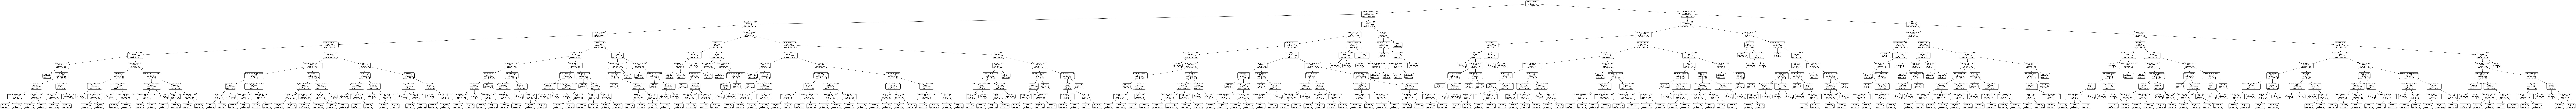

In [174]:
from IPython.display import Image
Image(filename='tree.png')  # The graph is too wide and maybe we should not present it in jupyter